In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# --- Compile ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# --- Early Stopping ---
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [40]:
# --- Train ---
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=60,
                    verbose=2)


Epoch 1/100
667/667 - 3s - 4ms/step - accuracy: 0.9297 - loss: 0.1966 - val_accuracy: 0.5155 - val_loss: 3.0679
Epoch 2/100
667/667 - 5s - 7ms/step - accuracy: 0.9369 - loss: 0.1823 - val_accuracy: 0.5171 - val_loss: 3.1750
Epoch 3/100
667/667 - 3s - 5ms/step - accuracy: 0.9308 - loss: 0.1939 - val_accuracy: 0.5245 - val_loss: 3.1989
Epoch 4/100
667/667 - 2s - 4ms/step - accuracy: 0.9392 - loss: 0.1714 - val_accuracy: 0.5108 - val_loss: 3.2081
Epoch 5/100
667/667 - 2s - 4ms/step - accuracy: 0.9362 - loss: 0.1763 - val_accuracy: 0.5147 - val_loss: 3.2598
Epoch 6/100
667/667 - 3s - 4ms/step - accuracy: 0.9398 - loss: 0.1718 - val_accuracy: 0.5072 - val_loss: 3.3423
Epoch 7/100
667/667 - 5s - 8ms/step - accuracy: 0.9381 - loss: 0.1744 - val_accuracy: 0.5169 - val_loss: 3.2961
Epoch 8/100
667/667 - 3s - 4ms/step - accuracy: 0.9320 - loss: 0.1888 - val_accuracy: 0.5162 - val_loss: 3.3295
Epoch 9/100
667/667 - 3s - 4ms/step - accuracy: 0.9446 - loss: 0.1574 - val_accuracy: 0.5101 - val_loss:

In [41]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.5093


In [42]:
# --- Best Accuracy ---
best_val_acc = max(history.history['val_accuracy'])
best_train_acc = max(history.history['accuracy'])
print(f"Best Train Accuracy: {best_train_acc:.4f}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Best Train Accuracy: 0.9911
Best Validation Accuracy: 0.5245


Test Accuracy: 0.5093
Test Loss: 5.1567
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


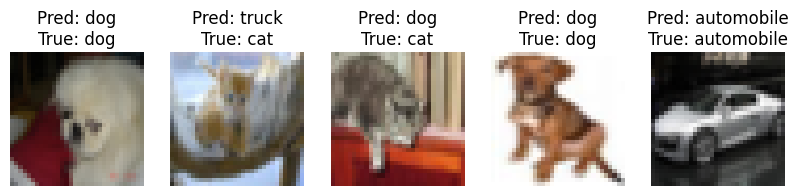

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# --- Evaluate on Test Set ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- Predict on Test Set ---
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# --- Show 5 random test images with predicted labels ---
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i, idx in enumerate(np.random.choice(len(x_test), 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()